In [1]:
from langgraph.graph import START,StateGraph,END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict

In [2]:
load_dotenv

<function dotenv.main.load_dotenv(dotenv_path: Union[str, ForwardRef('os.PathLike[str]'), NoneType] = None, stream: Optional[IO[str]] = None, verbose: bool = False, override: bool = False, interpolate: bool = True, encoding: Optional[str] = 'utf-8') -> bool>

In [3]:
model=ChatOpenAI()

In [5]:
#state
class LLM_blog_state(TypedDict):
    topic:str
    outline:str
    blog:str

In [6]:
def get_blog_outline(state:LLM_blog_state)->LLM_blog_state:
    #get the topic
    topic=state['topic']
    
    #create the prompt
    prompt=f'Generate an Outline for the topic {topic} for the blog'

    #get the outline
    outline=model.invoke(prompt).content

    state['outline']=outline

    return state

In [8]:
def get_blog(state:LLM_blog_state)->LLM_blog_state:
    #get the topic
    outline=state['outline']
    
    #create the prompt
    prompt=f'Generate a blog based on these outlines {outline}'

    #get the outline
    blog=model.invoke(prompt).content

    state['blog']=blog

    return state

In [ ]:
#initalize graph
graph=StateGraph(LLM_blog_state)

#add the nodes to graph
graph.add_node('get_blog_outline',get_blog_outline)
graph.add_node('get_blog',get_blog)

#add edges to the graph
graph.add_edge(START,'get_blog_outline')
graph.add_edge('get_blog_outline','get_blog')
graph.add_edge('get_blog',END)

#compile the graph
workflow=graph.compile()
print(workflow)

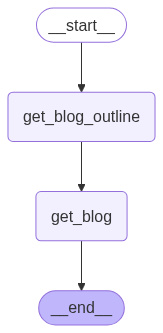

In [10]:
graph.compile()

In [11]:
initial_State={'topic':'MCP for beginner'}

final_state=workflow.invoke(initial_State)
print(final_state)

{'topic': 'MCP for beginner', 'outline': 'I. Introduction\n    A. Explanation of MCP (Master Control Program)\n    B. Importance of learning MCP for beginners\n\nII. What is MCP?\n    A. Definition\n    B. Overview of MCP features and functions\n\nIII. Benefits of learning MCP for beginners\n    A. Enhances problem-solving skills\n    B. Boosts understanding of computer systems\n    C. Improves technical knowledge and expertise\n\nIV. How to get started with MCP for beginners\n    A. Recommended resources and courses\n    B. Steps to set up and install MCP\n    C. Practice exercises and projects for hands-on learning\n\nV. Tips for mastering MCP as a beginner\n    A. Consistent practice and dedication\n    B. Utilizing online tutorials and forums\n    C. Seeking mentorship and guidance from experienced MCP users\n\nVI. Challenges and troubleshooting with MCP for beginners\n    A. Common issues and how to resolve them\n    B. Building resilience and problem-solving skills through trial 

In [13]:
print(final_state['blog'])

In the fast-paced world of technology, mastering the Master Control Program (MCP) is essential for beginners looking to expand their knowledge and skills in computer systems. In this blog, we will explore the significance of learning MCP, its features and functions, and how beginners can get started on their journey to mastering this crucial program.

I. Introduction

A. Explanation of MCP (Master Control Program)

MCP, also known as the Master Control Program, is a vital component of computer systems that manages the execution of various programs and processes. It is responsible for coordinating input/output operations, memory management, and overall system performance.

B. Importance of learning MCP for beginners

Learning MCP is crucial for beginners as it lays the foundation for understanding how computer systems operate. It helps develop problem-solving skills, enhances technical knowledge, and provides a deeper insight into the intricacies of computer programming.

II. What is MC